# Thresholding

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Simple Thresholding

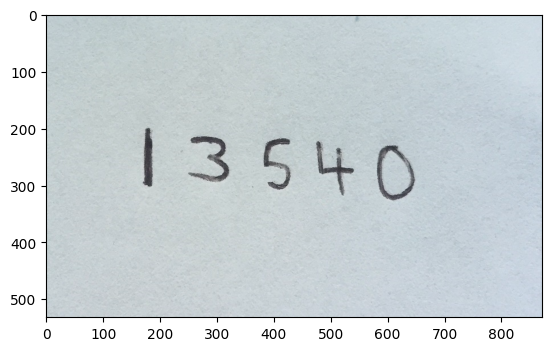

In [ ]:
image=cv2.imread("/content/numbers.jpg")
plt.imshow(image)

Flag Value	Name	Meaning

1 (or default)	cv2.IMREAD_COLOR	Loads image in BGR color (3 channels), discards transparency

0	cv2.IMREAD_GRAYSCALE	Loads image in grayscale

-1	cv2.IMREAD_UNCHANGED	Loads image with alpha channel if present (4 channels)

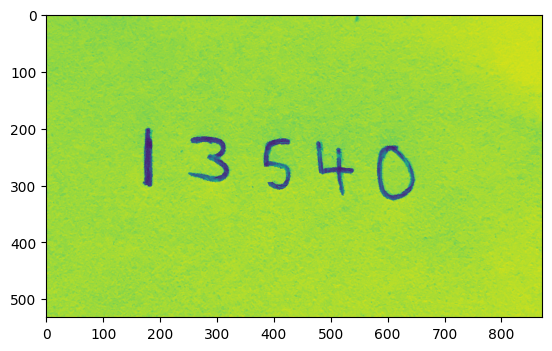

In [ ]:
image1=cv2.imread("/content/numbers.jpg",0)
plt.imshow(image1)

Parameter Explanation:

Parameter	Value	Meaning

image	: input image	Must be grayscale (2D array)

12:	threshold value	Pixels > 12 → set to max value

255:	max value	White (when threshold condition met)

cv2.THRESH_BINARY	threshold type	True binary output

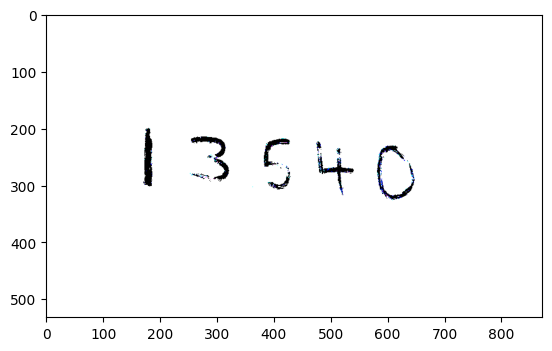

In [ ]:
retval,binary=cv2.threshold(image,100,255,cv2.THRESH_BINARY)
plt.imshow(binary)

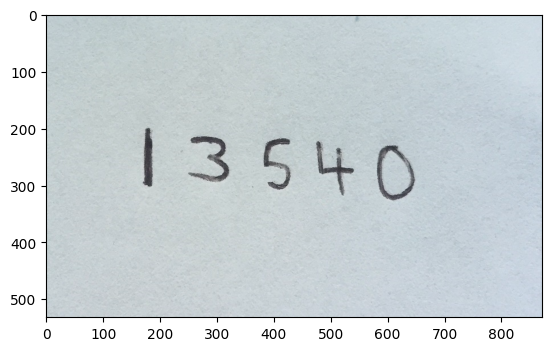

In [ ]:
plt.imshow(image)

In [ ]:
image_handwritten=cv2.imread("/content/Media.jpg",0)

In [ ]:
print(image_handwritten.dtype)

uint8


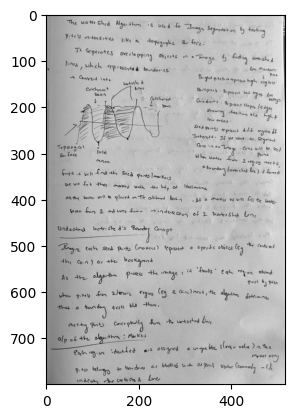

In [ ]:
plt.imshow(image_handwritten,cmap="gray")

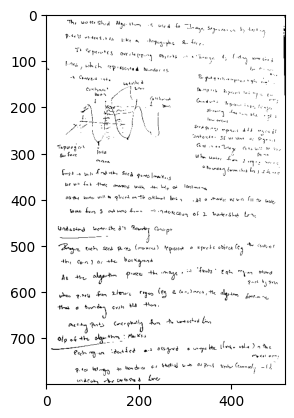

In [ ]:
retval2,binary2=cv2.threshold(image_handwritten, 100,255,cv2.THRESH_BINARY)
plt.imshow(binary2,cmap="gray")

# Adaptive Threshold


    255, Max value (white)
    cv2.ADAPTIVE_THRESH_MEAN_C,     # Local threshold = neighborhood mean

    cv2.THRESH_BINARY,              # Convert to binary image

    199, 5                           # blockSize = 199, constant C = 5

    the image we need to read in gray scale then only we apass input to asaptuve threshold

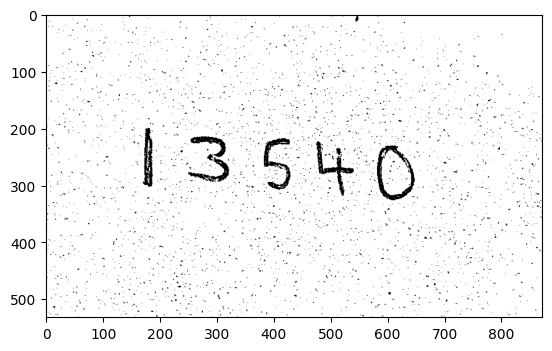

In [ ]:
## Adaptive Threshold
ad_threshold_image_m=cv2.adaptiveThreshold(image1,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,9)

plt.imshow(ad_threshold_image_m,cmap="gray")

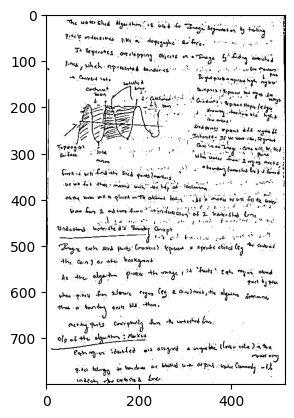

In [ ]:
## Adaptive Threshold
ad_threshold_hw_m=cv2.adaptiveThreshold(image_handwritten,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,9)

plt.imshow(ad_threshold_hw_m,cmap="gray")

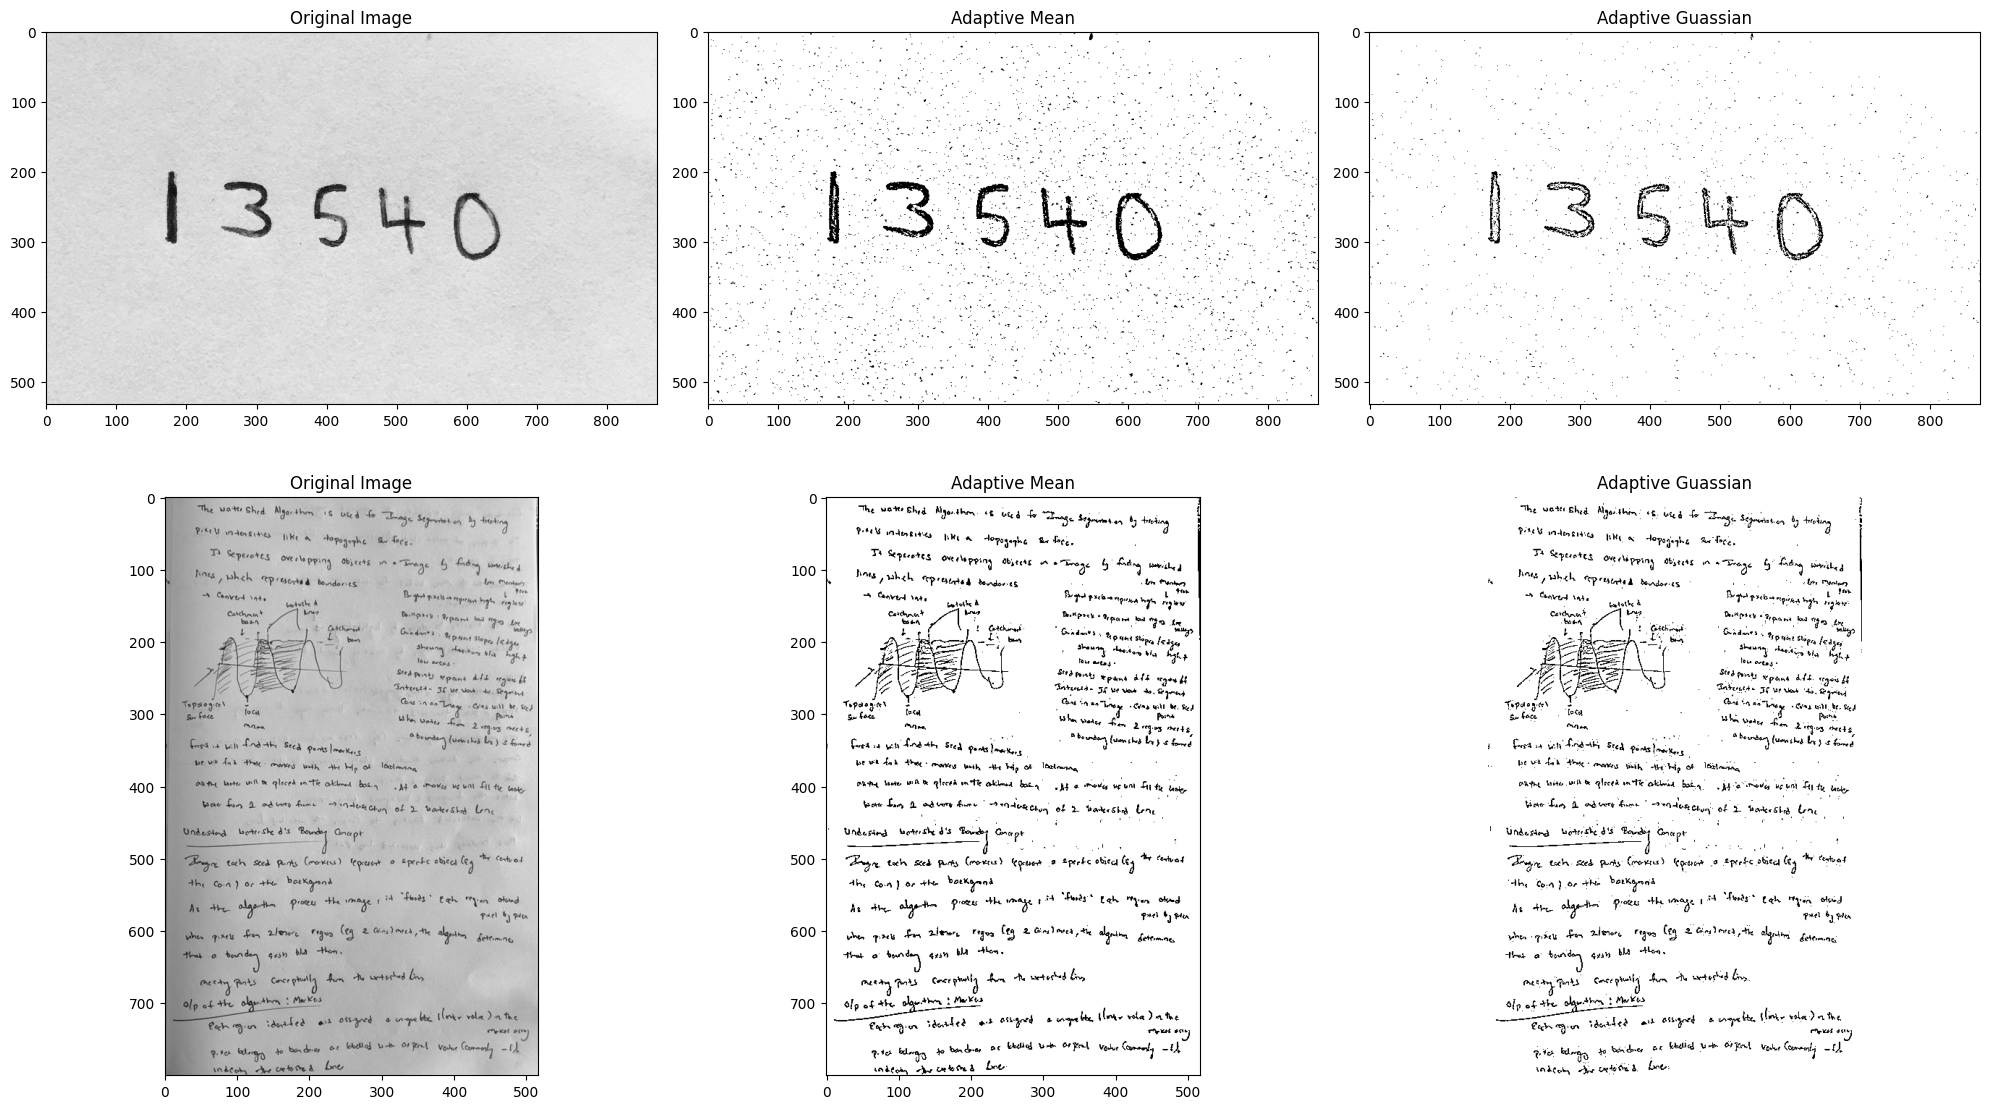

In [ ]:
ad_threshold_image_mean=cv2.adaptiveThreshold(image1,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,9)
ad_threshold_image_guassian=cv2.adaptiveThreshold(image1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,10)
ad_threshold_hw_mean=cv2.adaptiveThreshold(image_handwritten,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,20)
ad_threshold_hw_guassian=cv2.adaptiveThreshold(image_handwritten,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,15)

plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
plt.imshow(image1,cmap="gray")
plt.title("Original Image")

plt.subplot(2,3,2)
plt.imshow(ad_threshold_image_mean,cmap="gray")
plt.title("Adaptive Mean")

plt.subplot(2,3,3)
plt.imshow(ad_threshold_image_guassian,cmap="gray")
plt.title("Adaptive Guassian")

plt.subplot(2,3,4)
plt.imshow(image_handwritten,cmap="gray")
plt.title("Original Image")

plt.subplot(2,3,5)
plt.imshow(ad_threshold_hw_mean,cmap="gray")
plt.title("Adaptive Mean")

plt.subplot(2,3,6)
plt.imshow(ad_threshold_hw_guassian,cmap="gray")
plt.title("Adaptive Guassian")

plt.tight_layout()
plt.axis("off")
plt.show()



# Kmeans Clustering


In [ ]:
image=cv2.imread("/content/lea-l-q--99IzY8Lw-unsplash.jpg")

image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image_rgb.shape


(4800, 3285, 3)

In [ ]:
image_rgb.reshape((-1,3)) #faltten to 2d Image

array([[173, 150, 132],
       [173, 150, 132],
       [173, 150, 132],
       ...,
       [220, 220, 220],
       [220, 220, 220],
       [220, 220, 220]], dtype=uint8)

In [ ]:
pixel_values=image_rgb.reshape((-1,3))


<function ndarray.reshape>

🎯 Most Useful Reshape Options

Goal	Code	New Shape	Why

Use in ML like K-Means	(-1, 3)	(15768000, 3)	Each pixel becomes one sample

Flatten entire image	(-1,)	(47304000,)	Convert to 1D signal

Separate channels individually	reshape(3, -1)	(3, 15768000)	Each channel becomes 1 row

Create batches for NN	reshape(1, 4800, 3285, 3)	(1, H, W, C)	Add batch dimension

Swap channel order	transpose(2,0,1)	(3, 4800, 3285)	PyTorch format
Reshape to smaller 2D image ★

In [ ]:
pixel_values=np.float32(pixel_values)
print(pixel_values)

[[173. 150. 132.]
 [173. 150. 132.]
 [173. 150. 132.]
 ...
 [220. 220. 220.]
 [220. 220. 220.]
 [220. 220. 220.]]


In [ ]:
 criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2) #Stooping crieria for your kmeans clustering alogorithm. cv 2 term criteria epslon
 # if current iteration and your previous iteration if yoy have lost smaler than or equal to 0.2 then it will stop our k-means clustering
 k=3
#Total no of clsters

In [ ]:
print(cv2.TERM_CRITERIA_EPS)
print(cv2.TERM_CRITERIA_MAX_ITER)

"""This is a combination of two stop conditions for the K-Means algorithm:

Condition	Meaning
EPS	Stop when movement of centers becomes very small (converged)
MAX_ITER	Stop when maximum iteration count is reached"""

2
1


In [ ]:
cv2.kmeans(pixel_values,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

(17447005739.21273,
 array([[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]], dtype=int32),
 array([[172.91974 , 144.94635 , 127.0447  ],
        [197.06311 , 178.31071 , 165.17879 ],
        [ 80.87697 ,  45.368317,  20.434801]], dtype=float32))

In [ ]:
_,labels,centers=cv2.kmeans(pixel_values,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
#None-No Place holder
#10 refers no of times you k mean is going to execute with different intialization to find the best clustering  what is the best it will return to us
# Ho we definr the clusters . We need to define randomly at randompoints
"""Parameter	Meaning
cv2.TERM_CRITERIA_EPS	Stop if cluster position change is very small
cv2.TERM_CRITERIA_MAX_ITER	Stop if max iterations reached
100	Max iterations allowed
0.2	Minimum required improvement (error change)"""

In [ ]:
"""Output	What it represents
_	Compactness/error — ignored
labels	Which cluster each pixel belongs to
centers	Cluster centers → dominant colors"""

print(labels.shape) # we have 3 labels because we mwntion k=3
print(centers)

(15768000, 1)
[[ 80.877     45.368156  20.434492]
 [199.27496  181.00493  163.70021 ]
 [173.98582  144.74397  126.74409 ]]


In [ ]:
labels.flatten()


array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
centers[2][1] #centers[2] → the 3rd cluster (index 2)

# [1] → the 2nd value in that cluster (G channel)

np.uint8(144)

In [ ]:
# check what are different labels are therew
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [ ]:
#convert the centewrs in int

centers=np.uint8(centers)

In [ ]:
segmented_image=centers[labels.flatten()]
print(segmented_image)

#1 --[[199.27496  181.00493  163.70021 ]]
#0 --> [[[ 80.877     45.368156  20.434492]]]

[[173 144 126]
 [173 144 126]
 [173 144 126]
 ...
 [199 181 163]
 [199 181 163]
 [199 181 163]]


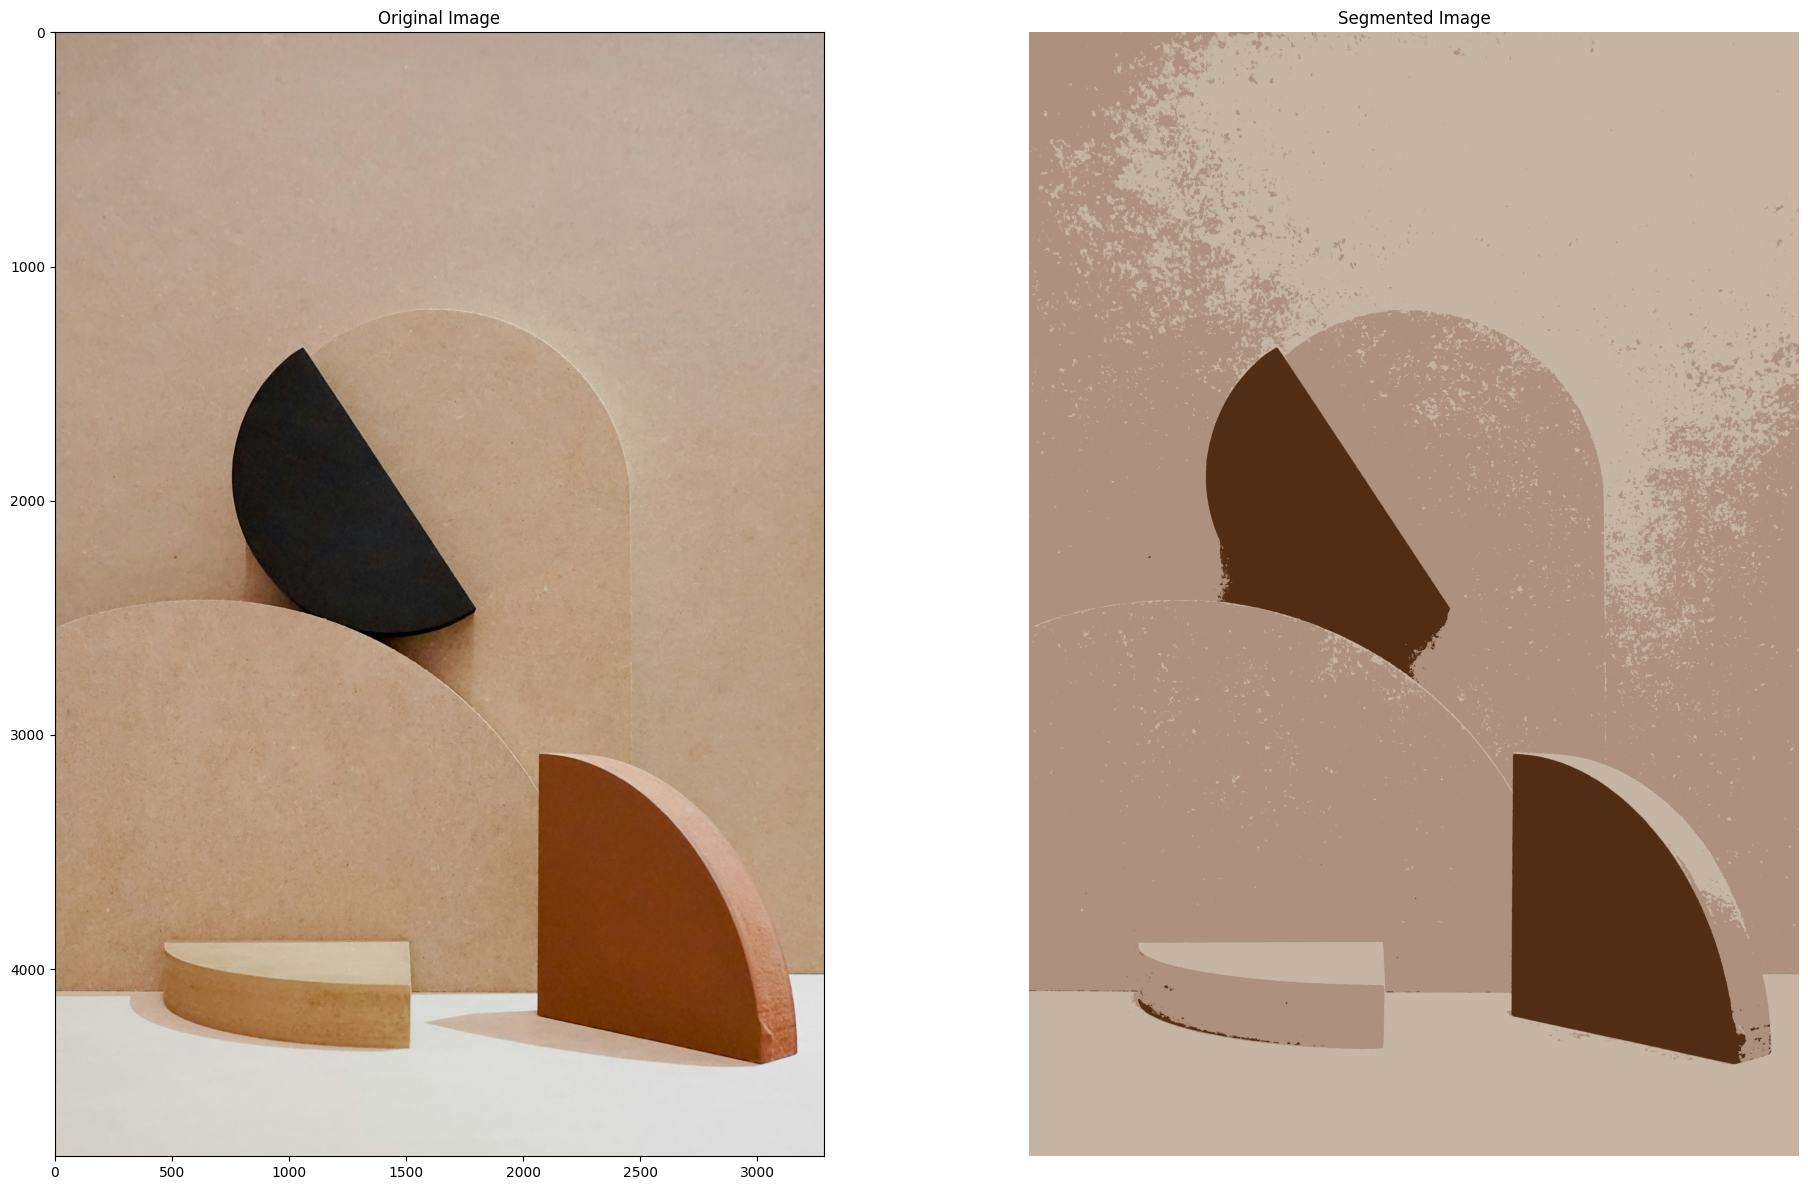

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title("Segmented Image")

plt.tight_layout()
plt.axis("off")
plt.show()

# Watershed algorithm

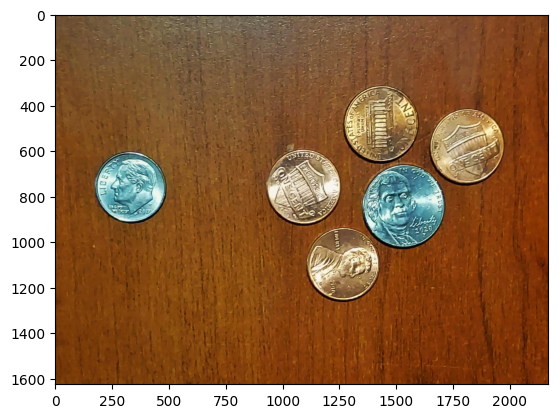

In [ ]:
image=cv2.imread("/content/Media (1).jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

original_image=image.copy()
plt.imshow(image)

In [ ]:
grey=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

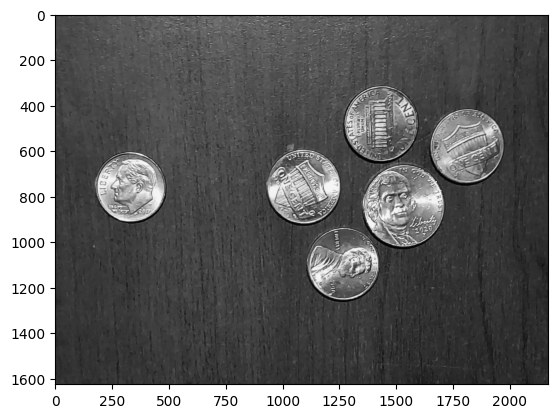

In [ ]:
plt.imshow(grey,cmap="grey")

In [ ]:
cv2.threshold(grey,170,255,cv2.THRESH_BINARY_INV) #170 is the threshold value

(170.0,
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

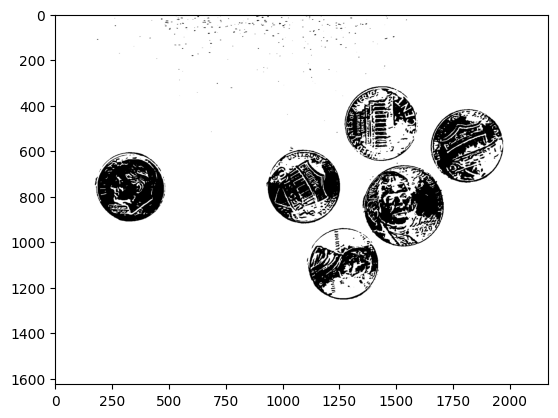

In [ ]:
thresh=cv2.threshold(grey,130,255,cv2.THRESH_BINARY_INV)[1] #inverse or we can use cv2.THRESH_BINARY eVERY THING BELOW IT IS CONSIDERED AS WHITE AND ABOVWE IT IS bLACK
plt.imshow(thresh,cmap="grey")

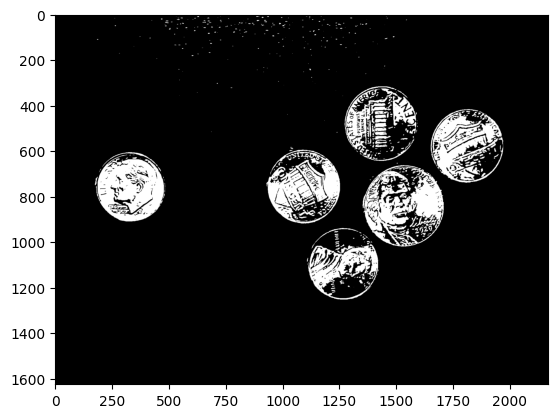

In [ ]:
mask_binary=cv2.threshold(grey,130,255,cv2.THRESH_BINARY)[1] #inverse or we can use cv2.THRESH_BINARY
plt.imshow(mask_binary,cmap="grey")

np.ones used for
Used for morphological operations (erode/dilate)

It decides how many neighboring pixels will affect the operation

What is cv2.MORPH_OPEN?

Opening = Erosion followed by Dilation

Remove small noise/white dots

✔ Smooth the boundaries of white objects

✔ Preserve the shape of bigger objects


Why iterations=2?

Means perform erosion+ dilation twice:

Stronger noise removal

More aggressive cleanup


Visual Effect Summary

Operation	Removes	Keeps

Erosion	Small white noise	May shrink main object

Dilation	Expands detected object	Fills gaps

Opening	Noise & small dots	Real foreground object

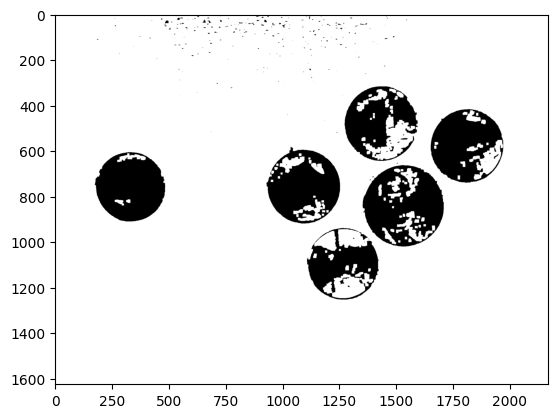

In [ ]:
#CREATE kernel to remove noise usinf morophologyEX
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=4)

plt.imshow(opening,cmap="gray")
#

In [ ]:
sure_bg= cv2.dilate(opening,kernel,iterations=3)
#dilate will make sure that we are getting only the sure background


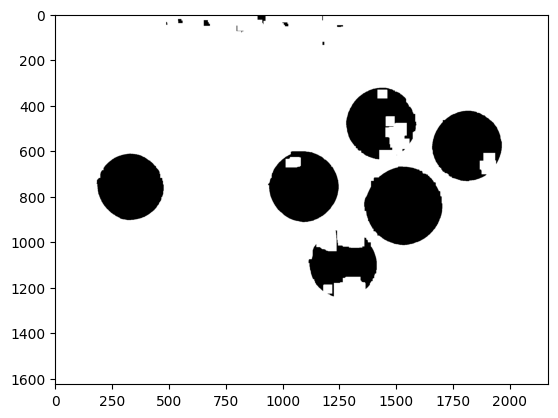

In [ ]:
plt.imshow(sure_bg,cmap="grey")

In [ ]:
# Bright backfground is the pure background it will reprsent the region that are definetly part of the object

# The fierst we are going to mention is distance transform from the center of the object

Parameter	Meaning

opening	The cleaned binary mask from morphological opening

cv2.DIST_L2	Distance type → Euclidean Distance (straight-line distance)

5	Mask size (neighborhood used for calculation)

In [ ]:
cv2.distanceTransform(opening,cv2.DIST_L2,3) #value will be 3 /5/0

array([[90.87943 , 90.46513 , 90.050835, ..., 97.058846, 97.473145,
        97.88744 ],
       [89.92444 , 89.51013 , 89.09583 , ..., 96.10384 , 96.51814 ,
        96.93244 ],
       [88.96944 , 88.55514 , 88.14083 , ..., 95.14884 , 95.56314 ,
        95.97745 ],
       ...,
       [74.14598 , 73.19098 , 72.23598 , ..., 35.7844  , 36.739403,
        37.6944  ],
       [74.56028 , 73.60528 , 72.650276, ..., 36.1987  , 37.1537  ,
        38.108704],
       [74.97458 , 74.01958 , 73.064575, ..., 36.613   , 37.568   ,
        38.523   ]], dtype=float32)

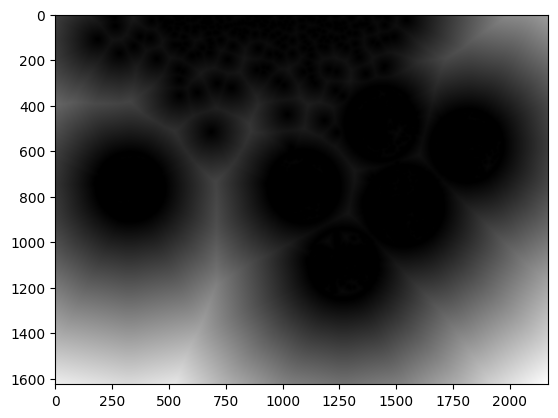

In [ ]:
DST_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
plt.imshow(DST_transform,cmap="gray")

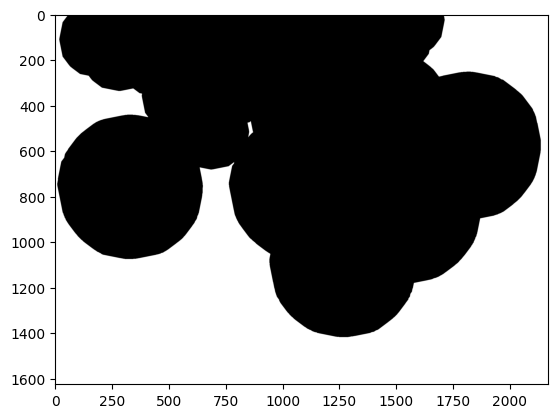

In [ ]:
_,sure_fg=cv2.threshold(DST_transform,0.2*DST_transform.max(),255,0) #below these threshoild considered as foreground assigned to a value of zero and pixel abpve the particualr threshold
sure_fg=np.uint8(sure_fg)
plt.imshow(sure_fg,cmap="gray")

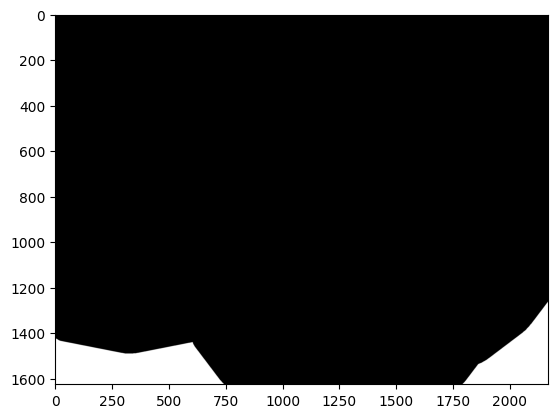

In [ ]:
sure_fg=np.uint8(sure_fg)
plt.imshow(sure_fg,cmap="gray")

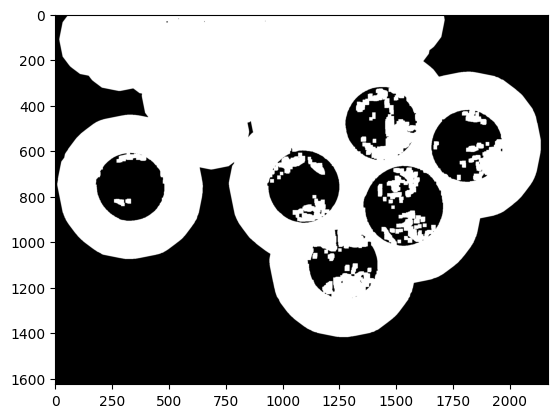

In [ ]:
unknown=cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown,cmap="gray")

In [ ]:
_,markers=cv2.connectedComponents(sure_fg)

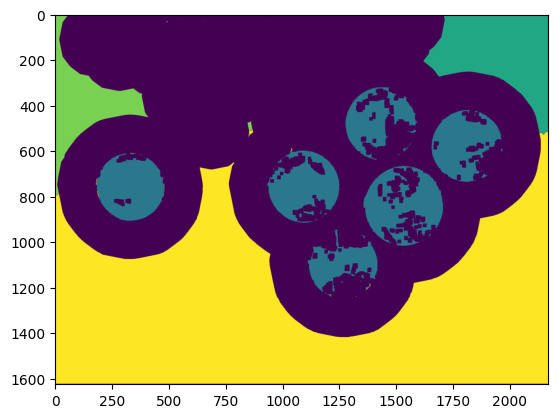

In [ ]:
markers=markers+1
markers[unknown==255]=0 # if the value is 255it is 0
plt.imshow(markers)

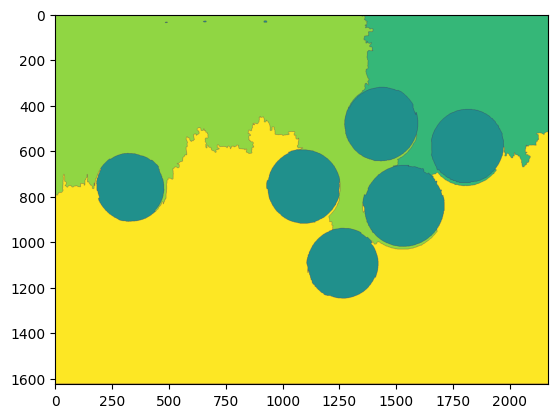

In [ ]:
markers=cv2.watershed(image,markers)
plt.imshow(markers)

In [ ]:
coin_mask=np.zeros_like(grey)

print(grey.shape)
print(coin_mask.shape)
#

(1625, 2168)
(1625, 2168)


In [ ]:
unique=np.unique(markers)

In [ ]:
instance_number=1
font=cv2.FONT_HERSHEY_SIMPLEX

for label in unique:
  if label==0 or label == -1:
    continue #we are going to ignore because no point of checking when there is water shed line

  mask=np.uint8(markers==label)
  # print(mask
  contours,_=cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


In [ ]:
for contour in contours:
  area=cv2.contourArea(contour)
  perimeter=cv2.arcLength(contour,True)
  if perimeter ==0:
    continue #thre is no need to check like the next line of code
  circular= 4 * np.pi*(area/(perimeter * perimeter))

print(circular)
print(area)

0.19086837452233765
1746962.5


In [ ]:
print(coin_mask.shape)
print(grey.shape)

(1625, 2168)
(1625, 2168)


In [ ]:
 if 0 < circular < 1.2 and area>10000:
  print(True)
  cv2.drawContours(original_image,[contour],-1,(0,255,0),2)
  x,y,w,h=cv2.boundingRect(contour)
  cv2.putText(original_image,f'coin {instance_number}',(x,y-10),font,0.6,(255,0,0),2)
  coin_mask=cv2.bitwise_or(coin_mask,grey)
  cv2.rectangle(original_image,(x-5,y-5),(x+w+5,y+h+5),(160,150,255),2)
  instance_number+=1

True


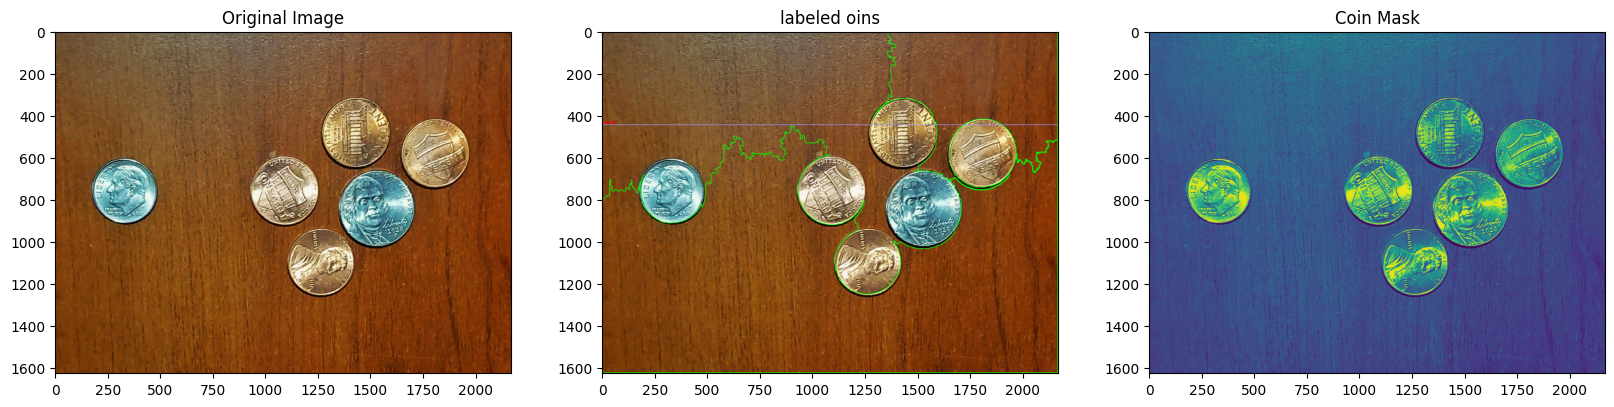

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(original_image)
plt.title("labeled oins")

plt.subplot(1,3,3)
plt.imshow(coin_mask)
plt.title("Coin Mask")

plt.show()